In [1]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math

# Charger vos données
immo = pd.read_csv('immo.csv')

# Calcul de l'âge de la vente
immo['prev_sold_date'] = pd.to_datetime(immo['prev_sold_date'])
immo['age_of_sale'] = (datetime.now() - immo['prev_sold_date']).dt.days

# Sélection des colonnes
colonnes_numeriques = ['bed', 'bath', 'acre_lot', 'house_size', 'age_of_sale']
colonnes_categorielles = ['city', 'state', 'zip_code']

# Séparation des variables indépendantes et dépendantes
X = immo[colonnes_numeriques + colonnes_categorielles]
y = immo['price']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('num', QuantileTransformer(), colonnes_numeriques),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colonnes_categorielles)
    ])

# Pipeline de traitement et de modélisation
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective ='reg:squarederror'))
])

# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

# Affichage des résultats de performance
print("Erreur quadratique moyenne (MSE) : ", mse)
print("Racine de l'erreur quadratique moyenne (RMSE) : ", rmse)
print("Erreur absolue moyenne (MAE) : ", mae)
print("Coefficient de détermination (R^2) : ", r2)

Erreur quadratique moyenne (MSE) :  372390337946.022
Racine de l'erreur quadratique moyenne (RMSE) :  610237.9355186155
Erreur absolue moyenne (MAE) :  238894.6510788868
Coefficient de détermination (R^2) :  0.7382921154096851


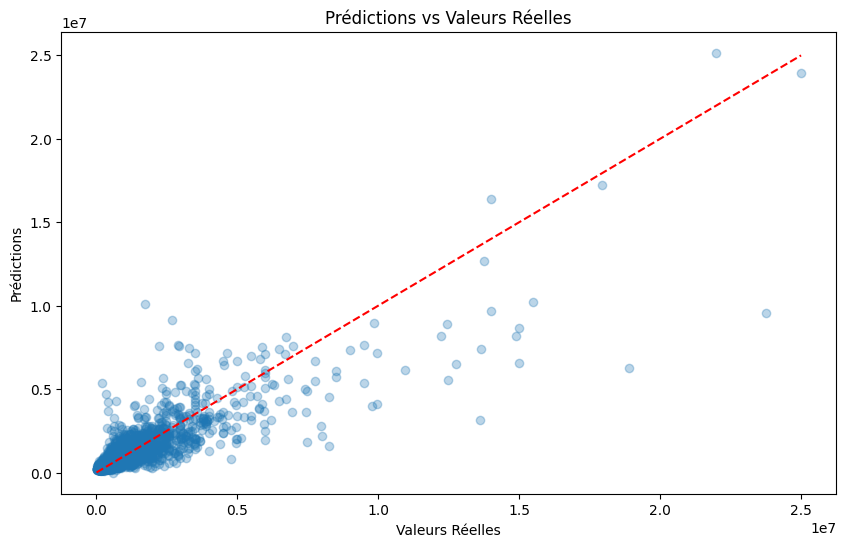

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des résidus
residus = y_test - y_pred

# Graphique de Prédiction vs Réalité
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs Réelles')
plt.show()